# Question 2

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from hw2q2 import hw2q2

np.random.seed(99)

rng = np.random.default_rng()

In [5]:
def cubic_polynomial(x, w):
    """ Computes the cubic polynomial c(x, w) """
    return w[0] + w[1]*x[0] + w[2]*x[1] + w[3]*x[0]**2 + w[4]*x[1]**2 + w[5]*x[0]*x[1] + \
           w[6]*x[0]**3 + w[7]*x[1]**3 + w[8]*x[0]**2*x[1] + w[9]*x[0]*x[1]**2

def ml_estimator(x_train, y_train):
    """ Computes the ML estimator for w """
    N = x_train.shape[1]
    X_design = np.vstack([
        np.ones(N), x_train[0], x_train[1], x_train[0]**2, x_train[1]**2, x_train[0]*x_train[1],
        x_train[0]**3, x_train[1]**3, x_train[0]**2*x_train[1], x_train[0]*x_train[1]**2
    ]).T
    w_ml = inv(X_design.T @ X_design) @ X_design.T @ y_train
    return w_ml

def map_estimator(x_train, y_train, gamma):
    """ Computes the MAP estimator for w with a Gaussian prior """
    N = x_train.shape[1]
    X_design = np.vstack([
        np.ones(N), x_train[0], x_train[1], x_train[0]**2, x_train[1]**2, x_train[0]*x_train[1],
        x_train[0]**3, x_train[1]**3, x_train[0]**2*x_train[1], x_train[0]*x_train[1]**2
    ]).T
    I = np.eye(X_design.shape[1])
    w_map = inv(X_design.T @ X_design + gamma * I) @ X_design.T @ y_train
    return w_map

def evaluate_model(x, y, w):
    """ Evaluates the model using average squared error """
    y_pred = np.array([cubic_polynomial(x[:, i], w) for i in range(x.shape[1])])
    return np.mean((y - y_pred) ** 2)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

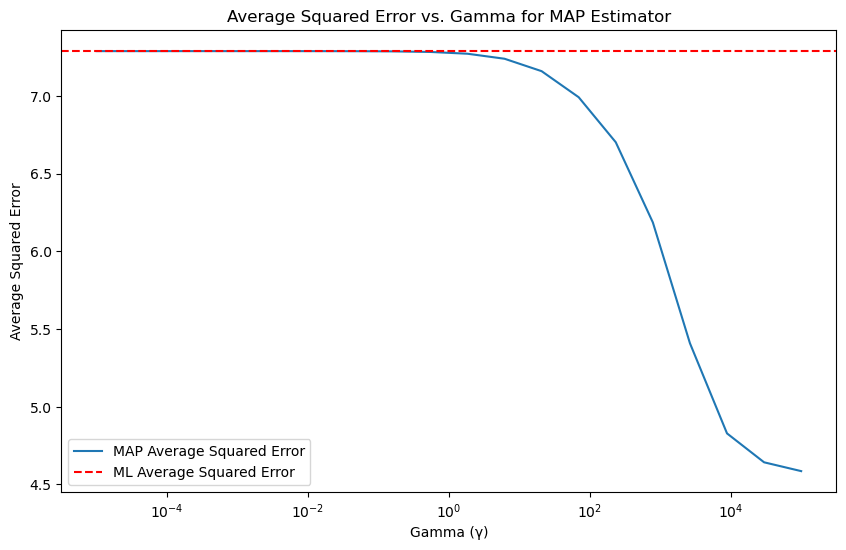

7.2895210219287225
[7.289520921709447, 7.289520685210609, 7.289519890622208, 7.289517221002335, 7.289508252160945, 7.289478125210564, 7.289376979935342, 7.289038000887267, 7.287908510287873, 7.28421338444776, 7.272725800326806, 7.240477270301143, 7.160522086032656, 6.992733759052845, 6.702966710005908, 6.1868475928449, 5.409243779749835, 4.828766764630165, 4.6427286744877145, 4.58598983898475]


In [8]:
x_train, y_train, x_validate, y_validate = hw2q2()

# Obtain ML estimator
w_ml = ml_estimator(x_train, y_train)

# Test a range of gamma values
gammas = np.logspace(-5, 5, 20)
errors_ml = evaluate_model(x_validate, y_validate, w_ml)
errors_map = []

for gamma in gammas:
    w_map = map_estimator(x_train, y_train, gamma)
    error_map = evaluate_model(x_validate, y_validate, w_map)
    errors_map.append(error_map)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(gammas, errors_map, label='MAP Average Squared Error')
plt.axhline(y=errors_ml, color='r', linestyle='--', label='ML Average Squared Error')
plt.xscale('log')
plt.xlabel('Gamma (γ)')
plt.ylabel('Average Squared Error')
plt.title('Average Squared Error vs. Gamma for MAP Estimator')
plt.legend()
plt.show()

print(errors_ml)
print(errors_map)